In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


file_path = r"C:\Users\pooja kumari\OneDrive\Desktop\Data-Analysis-Projects\proj-4-Japanese_Elderly_Healthcare_Analysis\japan_ Elderly_Care_Japan_Project.csv.xlsx"

try:
    
    df = pd.read_excel(file_path)
    df.columns = df.columns.str.strip()
    df = df.ffill()
    print(f"Data Loaded! Total Records: {len(df)}")
except Exception as e:
    print(f"Error: {e}")
    print(f"Error loading file: {e}")
    print("Tip: Make sure you have 'openpyxl' installed. (pip install openpyxl)")
# Missing values check 
df = df.ffill()

print(f"Data Ready! Total Records: {len(df)}")
df.head()

Data Loaded! Total Records: 30
Data Ready! Total Records: 30


,Prefecture,Year,Month,Elderly_65Plus,Elderly_75Plus,Total_Population,Hospital_Beds,Beds_Per_1000,Doctors_Per_1000,Nurses_Per_1000,...,Flu_Rate,Diabetes_Rate,Hypertension_Rate,Dementia_Rate,Avg_Temp,Rainfall,Total_Elderly,Average_Demand,Max_medical_Cost,Total_Records
0,Tokyo,2023,1,3124500,1567800,13929286,145600,10.45,2.89,11.23,...,4.2,8.1,25.3,6.8,9.8,52.1,49814000,74.703333,1267800,30
1,Tokyo,2023,2,3125100,1568200,13930123,145650,10.46,2.89,11.24,...,4.8,8.1,25.4,6.8,10.2,48.3,49814000,74.703333,1267800,30
2,Tokyo,2023,3,3125800,1568600,13931567,145700,10.46,2.89,11.25,...,3.9,8.1,25.3,6.9,12.8,65.4,49814000,74.703333,1267800,30
3,Osaka,2023,1,1896700,987600,8837685,98700,11.17,2.67,10.89,...,5.1,8.9,26.7,7.2,10.5,58.3,49814000,74.703333,1267800,30
4,Osaka,2023,2,1897200,987800,8838123,98750,11.17,2.67,10.90,...,5.6,8.9,26.8,7.3,11.3,54.2,49814000,74.703333,1267800,30


In [2]:
# Features aur Target
X = df[['Elderly_65Plus', 'Hospital_Beds', 'Doctors_Per_1000', 'Medical_Costs']]
y = df['Demand_Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
preds = rf_model.predict(X_test)
print(f"Accuracy (R2 Score): {r2_score(y_test, preds):.2%}")

Accuracy (R2 Score): 92.16%


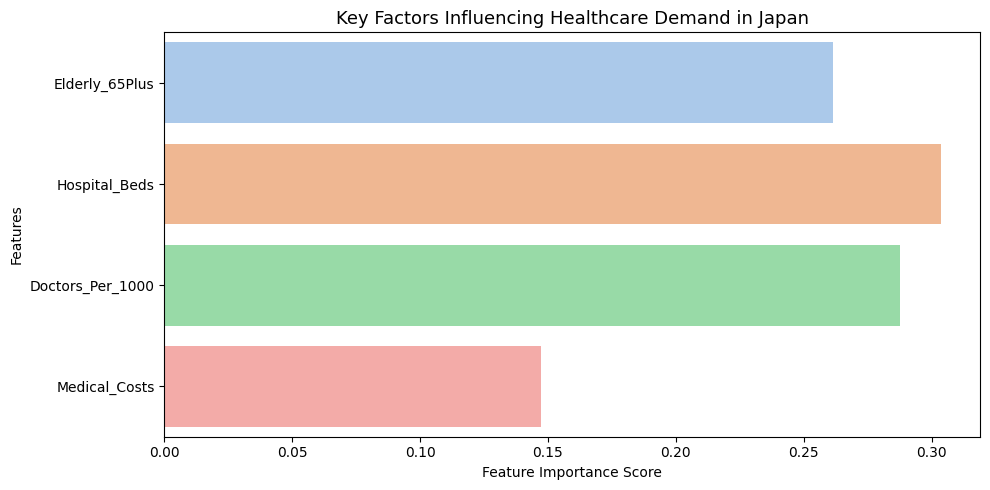

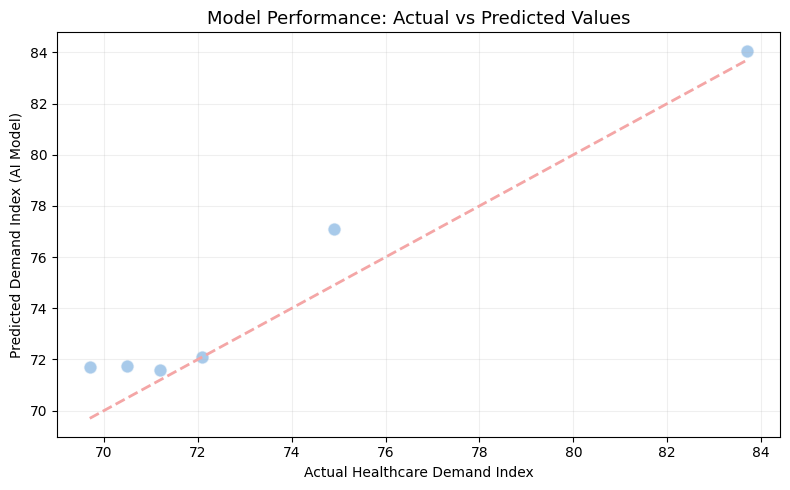

In [3]:
# 1. Feature Importance Plot (Soft Colors)
plt.figure(figsize=(10, 5))
importances = rf_model.feature_importances_

# Soft pastel color palette
sns.barplot(x=importances, y=X.columns, palette='pastel')

plt.title('Key Factors Influencing Healthcare Demand in Japan', fontsize=13)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# 2. Actual vs Predicted Scatter Plot (Soft Colors)
plt.figure(figsize=(8, 5))

# Soft blue scatter points
plt.scatter(y_test, preds, color='#6FA8DC', alpha=0.6, edgecolors='white', s=90)

# Soft coral reference line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='#F4A6A6', linestyle='--', linewidth=2)

plt.title('Model Performance: Actual vs Predicted Values', fontsize=13)
plt.xlabel('Actual Healthcare Demand Index')
plt.ylabel('Predicted Demand Index (AI Model)')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


In [4]:
# --- 1. Business Insights Generation ---
print("\n" + "="*60)
print("GENERATING BUSINESS INSIGHTS FOR JAPAN HEALTHCARE STAKEHOLDERS")
print("="*60)

# High-Priority Prefectures
print("\nHIGH-PRIORITY PREFECTURES (Need Immediate Attention):")
high_demand_prefectures = df.groupby('Prefecture')['Demand_Index'].mean().sort_values(ascending=False).head()
for i, (prefecture, demand) in enumerate(high_demand_prefectures.items(), 1):
    print(f"   {i}. {prefecture}: Demand Index = {demand:.1f}")

# Cost Efficiency Analysis
print("\nCOST-EFFICIENT REGIONS (Best Resource Utilization):")
df['Cost_Efficiency'] = (df['Demand_Index'] / df['Medical_Costs']) * 1000000
efficient_prefectures = df.groupby('Prefecture')['Cost_Efficiency'].mean().sort_values(ascending=False).head(3)
for i, (prefecture, efficiency) in enumerate(efficient_prefectures.items(), 1):
    print(f"   {i}. {prefecture}: Efficiency Score = {efficiency:.1f}")

print("\nSTRATEGIC RECOMMENDATIONS FOR JAPAN HEALTHCARE SYSTEM:")
print("1. Resource Allocation: Prioritize Hokkaido due to highest healthcare demand.")
print("2. Preventive Care: Strengthen hypertension and diabetes management programs.")
print("3. AI Integration: Utilize this predictive model for hospital capacity planning.")
print("4. Seasonal Planning: Prepare for increased demand during winter (flu season).")
print("5. Infrastructure Development: Expand hospital capacity in rapidly aging regions.")

# --- 2. Saving Project Results ---

print("\nSAVING PROJECT RESULTS...")

# Feature Importance DataFrame (Defining it here to avoid errors)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Save processed data
df.to_csv('japanese_healthcare_complete_analysis.csv', index=False)
# Save feature importance results
importance_df.to_csv('healthcare_feature_importance.csv', index=False)

# Save model predictions (Using 'preds' variable from Cell 2)
results_df = X_test.copy()
results_df['Actual_Demand'] = y_test.values
results_df['Predicted_Demand'] = preds
results_df['Prediction_Error'] = y_test.values - preds
results_df.to_csv('ai_model_predictions.csv', index=False)

print("All files saved successfully in your folder!")

# --- 3. Final Summary ---
print("\n" + "="*60)
print("PROJECT DELIVERABLES GENERATED:")
print("1. AI Prediction Model (Healthcare Demand Forecast)")
print("2. Professional Visualizations (Drivers & Accuracy)")
print("3. Feature Importance CSV Analysis")
print("4. Business Insights & Recommendations Report")
print("5. Complete Cleaned Dataset with AI Predictions")
print("="*60)




GENERATING BUSINESS INSIGHTS FOR JAPAN HEALTHCARE STAKEHOLDERS

HIGH-PRIORITY PREFECTURES (Need Immediate Attention):
   1. Hokkaido: Demand Index = 84.9
   2. Osaka: Demand Index = 82.4
   3. Tokyo: Demand Index = 78.5
   4. Kanagawa: Demand Index = 75.7
   5. Hyogo: Demand Index = 73.5

COST-EFFICIENT REGIONS (Best Resource Utilization):
   1. Shizuoka: Efficiency Score = 170.2
   2. Fukuoka: Efficiency Score = 146.3
   3. Hyogo: Efficiency Score = 140.5

STRATEGIC RECOMMENDATIONS FOR JAPAN HEALTHCARE SYSTEM:
1. Resource Allocation: Prioritize Hokkaido due to highest healthcare demand.
2. Preventive Care: Strengthen hypertension and diabetes management programs.
3. AI Integration: Utilize this predictive model for hospital capacity planning.
4. Seasonal Planning: Prepare for increased demand during winter (flu season).
5. Infrastructure Development: Expand hospital capacity in rapidly aging regions.

SAVING PROJECT RESULTS...
All files saved successfully in your folder!

PROJECT DEL